# Module 2 Code Challenge

Welcome to your Module 2 Code Challenge. This code challenge is designed to test your understanding of the Module 2 material. It covers:

- Statistical Distributions
- Statistical Tests
- Bayesian Statistics
- Linear Regression

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions: 

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

In [1]:
# Run this cell without changes to import the necessary libraries

# Use any additional libraries you like to complete this assessment 

import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

---
## Part 1: Statistical Distributions [Suggested time: 25 minutes]
---

### Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

### 1.1) Write a function to compute the z-scores for single check of amount `check_amt`.

In [2]:
# Replace `pass` with appropriate code

# (x - pop_mean) / standard_dev

def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    """
    pop_mean = 20
    pop_std_dev = 2
    return (check_amt - pop_mean) / pop_std_dev

### 1.2) Use your function to compute the z-score for a 24 dollar check, and interpret the result using the empirical rule. 

In [3]:
# Code here 
z_score(24)

2.0

In [ ]:
"""
The z-score for this given data point (a single check of $24) represents a distance from the population mean.
In this case, the check is 2 standard deviations from the population mean.
We expect 95% of the population's data points to fall within 2 standard deviations of the mean, and this data point is just on that cusp of the upper boundary.
"""

### 1.3) Using $\alpha = 0.05$, is the 24 dollar check significantly _greater_ than the mean? How do you know this?  

For reference, here is a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [ ]:
# z-score = 2 and alpha = .05
# manual lookup of table with above parameters gives .9798

In [5]:
# Code here 
z_value = .9798
p_value = 1 - z_value
p_value

0.020199999999999996

In [ ]:
"""
The z-table has given us the cumulative probability of our data point falling within a particular range, or everything up until the z-score of 2.
The p-value, calculated with 1 minus the z-value, gives us the probability of this, assuming that this check is part of the population distribution
Since the p-value is less than the alpha, we reject the null hypothesis (which states that this check is part of the population of checks).
We support the alternative hypothesis, which states the $24 check is significantly greater than the mean.
"""

### Confidence Intervals and the Central Limit Theorem

### 1.4) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [43]:
# Code here 
# z* at 95% confidence = 1.96
# sample_mean = 24
# pop_std_dev = 2

z_star = 1.96
sample_mean = 24
pop_std_dev = 2

lower_bound = sample_mean - (z_star * (pop_std_dev))

upper_bound = sample_mean + (z_star * (pop_std_dev))

print(lower_bound)
print(upper_bound)

20.08
27.92


In [ ]:
"""
We are 95% confident that the true population mean falls between 20.08 and 27.92.
"""

### 1.5) Imagine that we didn't know how the population of check totals was distributed. How would _sampling_ and the _Central Limit Theorem_ allow us to make inferences on the population mean, i.e. estimate $\mu, \sigma$ of the population mean?

In [ ]:
"""
The Central Limit Theorem allows us to work with samples of the data to make inferences of the population mean and standard deviation.
The underlying data may not be normally distributed, we'll say if the restaurant offers two pre-fixe options for $20 and $60 but that's it.
We can take individual samples of the overall population.
If we plot the means of the samples, they will start to resemble a normal distribution.
The mean and the standard deviation of the SAMPLES will approximate the mean and standard deviation of the population.
"""

---
## Part 2: Statistical Testing [Suggested time: 15 minutes]
---

The TexMex restaurant recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals, respectively. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

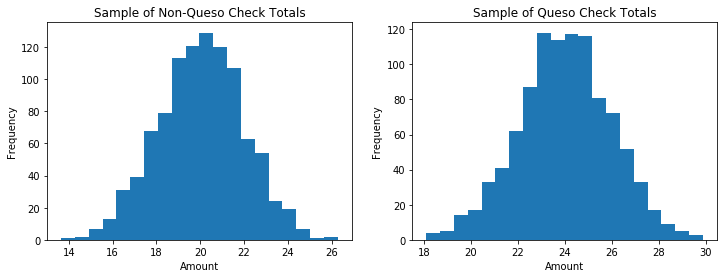

In [9]:
# Run this cell without changes

# Load the sample data 
no_queso = pickle.load(open('data/no_queso.pkl', 'rb'))
queso = pickle.load(open('data/queso.pkl', 'rb'))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### Hypotheses and Errors

The restaurant owners want to know if customers who order queso spend **more or less** than customers who do not order queso.

### 2.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

In [ ]:
"""
Paired two-sample, two-tailed t-test
H0: There is no difference between the spending of queso customers and the spending of no-queso customers.
H1: The queso customers spend signficantly more or significantly less than no-queso customers.
"""

### 2.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

In [ ]:
"""
Type I errors: When H0 was actually true, we rejected it. There was no actual difference in spending between queso customers and no-queso customers, but we rejected that hypothesis. 
Type 2 errors: When H0 was actually false, we failed to reject it. There was an actual difference in spending between queso customers and no-queso customers, and we failed to reject that hypothesis.
"""

### Sample Testing

### 2.3) Run a statistical test on the two samples. Can you reject the null hypothesis? 

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

You can use `scipy.stats` to find the answer if you like.  It has already been imported as `stats` and the statistical testing documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

In [12]:
# Code here
stats.ttest_rel(no_queso, queso)

Ttest_relResult(statistic=-45.78189546679045, pvalue=1.5335832587878706e-247)

In [ ]:
"""
After running a two-sample t-test, we get a very, very tiny p-value.
Since it's less than the alpha value (divided by two since it's a two-tailed test), we can reject the null hypothesis.
We support the alternative hypothesis, which is that there is a signficiant change in spending when ordering queso.
"""

---
## Part 3: Bayesian Statistics [Suggested time: 15 minutes]
---
### Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a large, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

### 3.1) What is the probability of Thomas getting a small puppy?
Show your work, not just the final result

In [ ]:
# pet store, then pound
# small: (.6 * .2) + (.1 * .8)
# medium: (.3 * .2) + (.35 * .8)
# large: (.1 * .2) + (.55 * .8)

In [14]:
# Code here to find the probability
small_prob = (.6 * .2) + (.1 * .8)
small_prob

0.2

### 3.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
Show your work, not just the final result

In [13]:
# a: he went to the pet store
# b: he got a Large
# a given b: he went to the pet store, given having gotten a Large
# b given a: he got a Large, having went to the pet store

In [15]:
a = .2
b = (.1 * .2) + (.55 * .8)
b_given_a = .1

In [16]:
# Code here to find the probability
large_given_pstore_prob = (b_given_a * a) / b
large_given_pstore_prob

0.043478260869565216

### 3.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
Show your work, not just the final result

In [20]:
# a1: he went to the pet store
# b1: he got a Small
# a given b 1: he went to the pet store, given having gotten a Small
# b given a 1: he got a Small, having went to the pet store

# a2: he went to the pound
# b2: he got a Small
# a given b 2: he went to the pound, given having gotten a Small
# b given a 2: he got a Small, having went to the pound

a1 = .2
b1 = .2
b_given_a_1 = .6

prob_1 = (b_given_a_1 * a1) / b1

a2 = .8
b2 = .2
b_given_a_2 = .1

prob_2 = (b_given_a_2 * a2) / b2

print(prob_1)
print(prob_2)

0.6
0.4000000000000001


In [ ]:
"""
It's more likely that he went to the pet store (60%) than having gone to the pound (40%). Work above.
"""

### 3.4) For Question 3.2, what are the prior, posterior, and likelihood?

In [ ]:
"""
Prior: Went to the pet store
Posterior: He went to the pet store, (given) having gotten a Large
Likelihood: He got a large puppy, (given) having gone to the pet store
"""

---
## Part 4: Linear Regression [Suggested Time: 10 min]
---

In this section, you'll be using the Advertising data, and you'll be creating linear models that are more complicated than a simple linear regression. The relevant modules have already been imported at the beginning of this notebook. We'll load and prepare the dataset for you below.

In [21]:
# Run this cell without changes

data = pd.read_csv('data/advertising.csv').drop('Unnamed: 0', axis=1)
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [22]:
# Run this cell without changes

X = data.drop('sales', axis=1)
y = data['sales']

In the linear regression section of the curriculum, you analyzed how TV, Radio, and Newspaper spendings individually affected the Sales figures. Here, we'll use all three together in a multiple linear regression model!

### 4.1) Create a Correlation Matrix for `X`.

In [24]:
# Code here
X.corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


### 4.2) Based on this correlation matrix only, would you recommend to use `TV`, `radio`, and `newspaper` in the same multiple linear regression model?

In [ ]:
"""
There's a possibility of multicollinearity between radio and newspaper. They may provide some overlap (redunancy).
I can't think of many people who listen to radio and newspaper...maybe the same people who do one do both?
I'd do three sets of multiple regression modelling, A with all three, B without radio, and C without newspaper.
"""

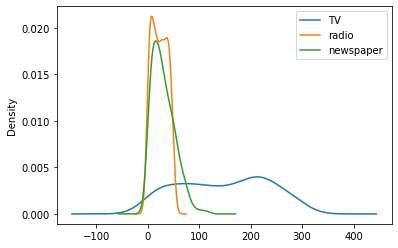

In [33]:
X.plot.kde()

### 4.3) Use StatsModels' `ols`-function to create a multiple linear regression model with `TV`, `radio`, and `newspaper` as independent variables and `sales` as the dependent variable. 

**Required output:** the model summary of this multiple regression model.

In [31]:
# Code here
model=ols('y~X', X).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.58e-96
Time:                        10:36:58   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
X[0]           0.0458      0.001     32.809      0.000       0.043       0.049
X[1]           0.1885      0.009     21.893      0.000       0.172       0.206
X[2]          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.4) Do we have any statistically significant coefficients? If the answer is yes, list them below.

In [ ]:
# X[0] is TV
# X[1] is radio
# X[2] is newspaper

In [ ]:
"""
The TV and radio coefficients are statistically significant.
They each have a very low P-value, meaning that we can reject the presumed Null Hypothesis that they do NOT have an impact on the model.
"""